# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sms
import warnings

warnings.simplefilter(action='ignore')
%matplotlib inline

# Uploading dataset

In [3]:
df = pd.read_csv('data-sets/salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M
1,2023,EX,FT,Data Science Director,190000,USD,190000,US,0,US,M
2,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
3,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
4,2023,SE,FT,Machine Learning Engineer,245700,USD,245700,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
8800,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8801,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8802,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8803,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# Preparing  data for analysis

## Check the data types

In [4]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

There is nothing wrong with the data types

## Check the values for missing

In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no missings

## General information of data

In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,8805.000000,8.805000e+03,8805.000000,8805.000000
mean,2022.737422,1.747287e+05,149488.265645,38.693924
std,0.542484,4.560690e+05,64222.105058,48.068060
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.055000e+05,105000.000000,0.000000
50%,2023.000000,1.441000e+05,142200.000000,0.000000
75%,2023.000000,1.900000e+05,185900.000000,100.000000
max,2023.000000,3.040000e+07,615201.000000,100.000000


# Analysis

## Distribution of salary in USD

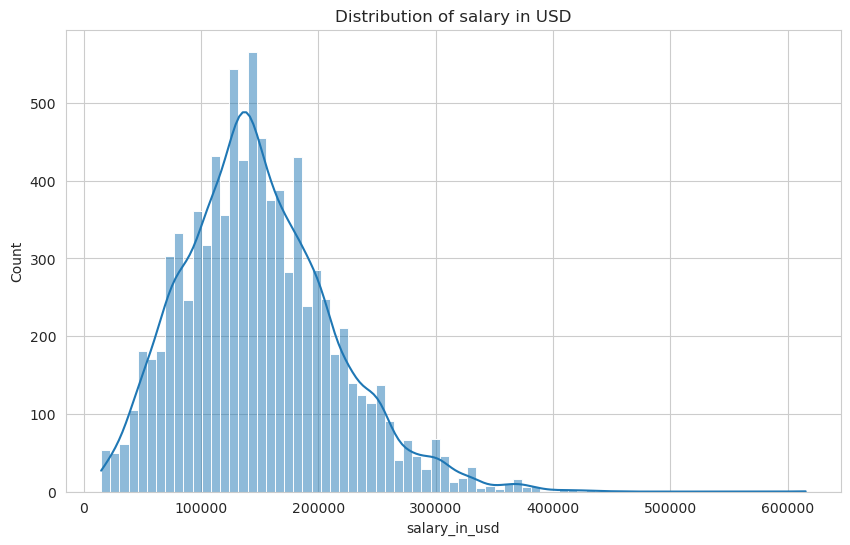

In [7]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribution of salary in USD')

plt.show()

Salaries have a normal distribution, although there are a few outliers to the upside

## Number of salary data by experience level

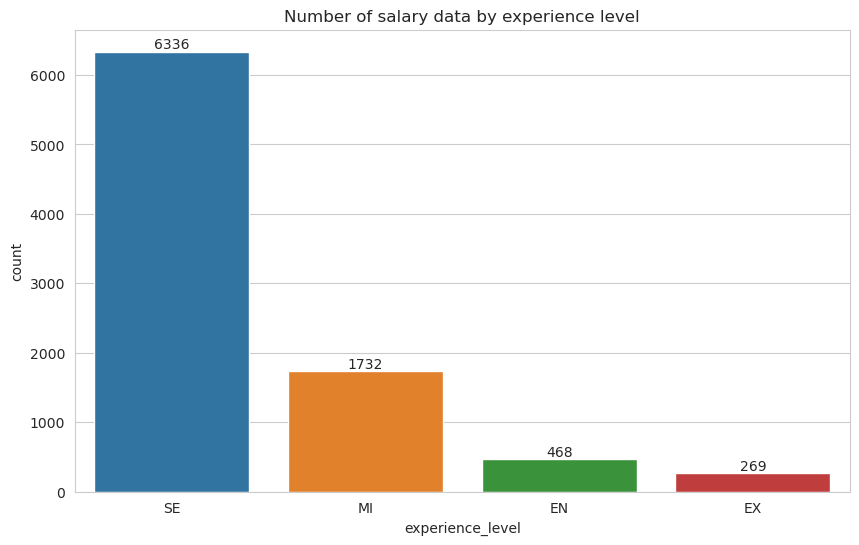

In [58]:
df_exp = df['experience_level'].value_counts().to_frame().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(df_exp, x='experience_level', y='count')
plt.title('Number of salary data by experience level')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

EN - Entry-level / Junior

MI - Mid-level / Intermediate

SE - Senior-level / Expert

EX - Executive-level / Director

In this dataset, we have the most data on Senior-level workers and the least on Executive-level

## Number of salary data by employment type

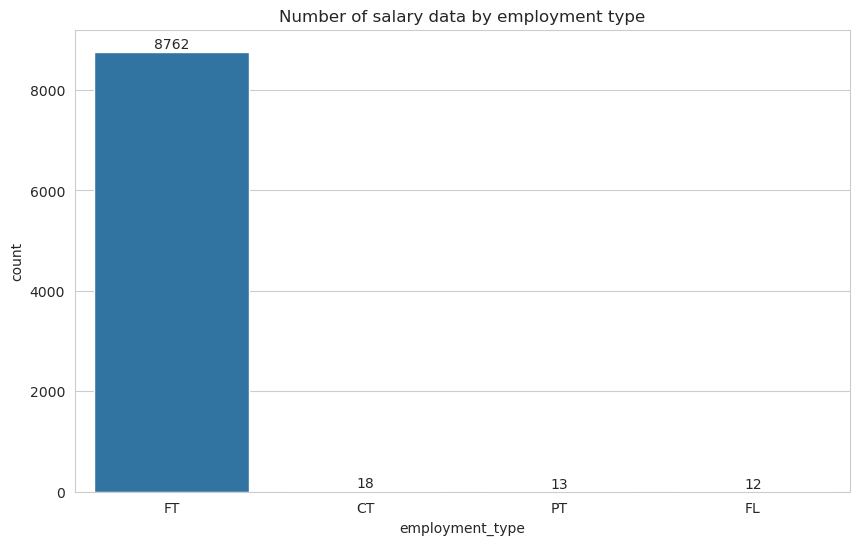

In [36]:
df_emp_type = df['employment_type'].value_counts().to_frame().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(df_emp_type, x='employment_type', y='count')
plt.title('Number of salary data by employment type')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

PT - Part-time

FT - Full-time

CT - Contract

FL - Freelance

The dataset provides the most data on Full-time workers, with very little for others

## Boxplot of Salary

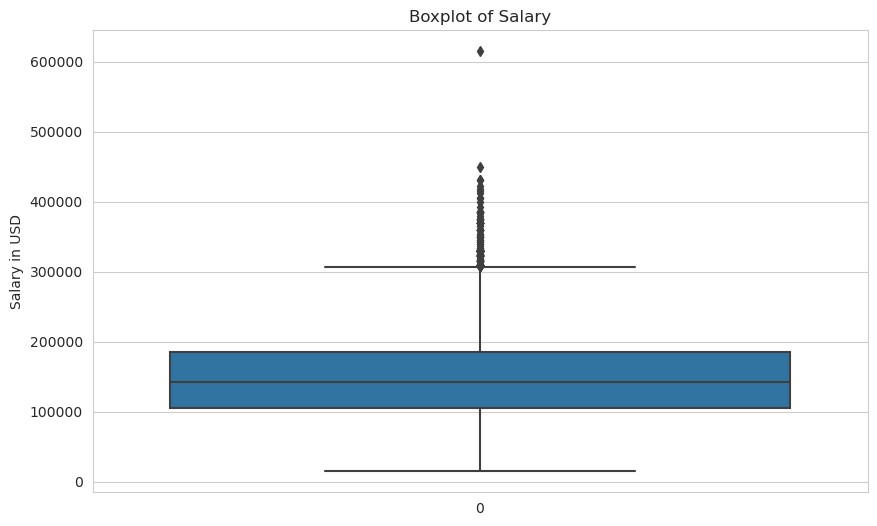

Q1 = 105000$
Q3 = 185900$
Median = 142200$


In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['salary_in_usd'])
plt.ylabel('Salary in USD')
plt.title('Boxplot of Salary')

plt.show()

print(f'Q1 = {df["salary_in_usd"].quantile(0.25):.0f}$')
print(f'Q3 = {df["salary_in_usd"].quantile(0.75):.0f}$')
print(f'Median = {df["salary_in_usd"].median():.0f}$')

It can be seen that the dataset has salaries that deviate strongly upward.

## Number of salary data by company location

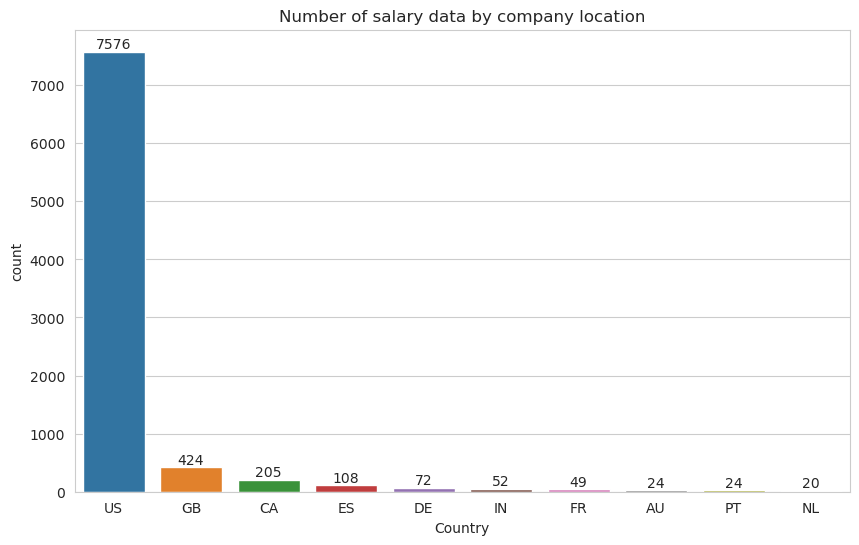

In [48]:
df_location = df['company_location'].value_counts().to_frame().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(df_location.head(10), x='company_location', y='count')
plt.title('Number of salary data by company location')
plt.xlabel('Country')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In the dataset, most salaries are taken from companies that are located in the US.
The graph shows only 10 countries, with even less data from the remaining countries

Due to lack of data, it is unfortunately not possible to compare salaries across countries

## Number of salary data by remote ratio

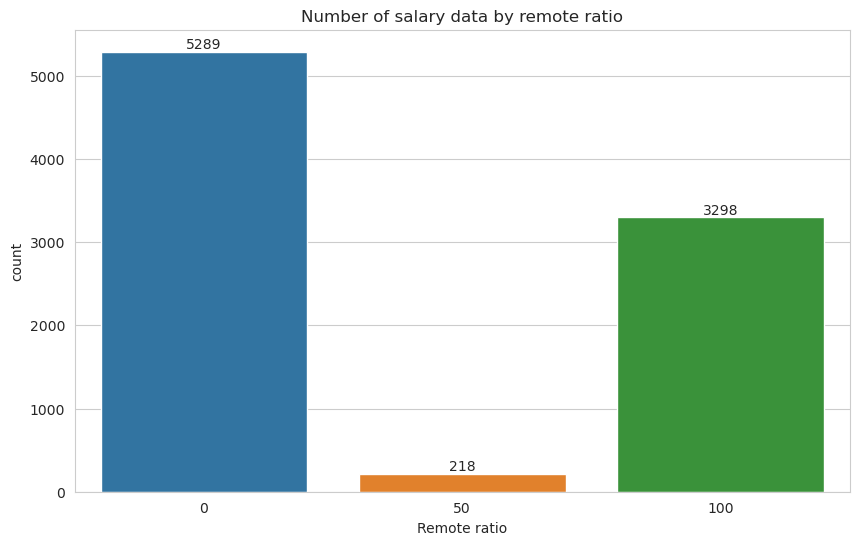

In [52]:
df_remote = df['remote_ratio'].value_counts().to_frame().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(df_remote, x='remote_ratio', y='count')
plt.title('Number of salary data by remote ratio')
plt.xlabel('Remote ratio')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

0 - No remote work (less than 20%)

50 - Partially remote/hybird

100 - Fully remote (more than 80%)

## Number of salary data by company size

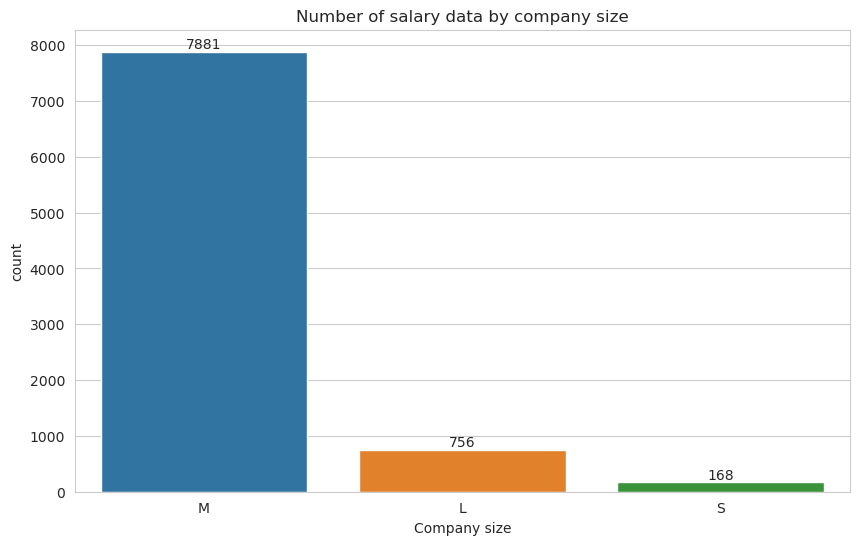

In [138]:
df_size = df['company_size'].value_counts().to_frame().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(df_size, x='company_size', y='count')
plt.title('Number of salary data by company size')
plt.xlabel('Company size')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

S - less than 50 employees (small)

M - 50 to 250 employees (medium)

L - more than 250 employees (large)

## Number of salary data by jobs

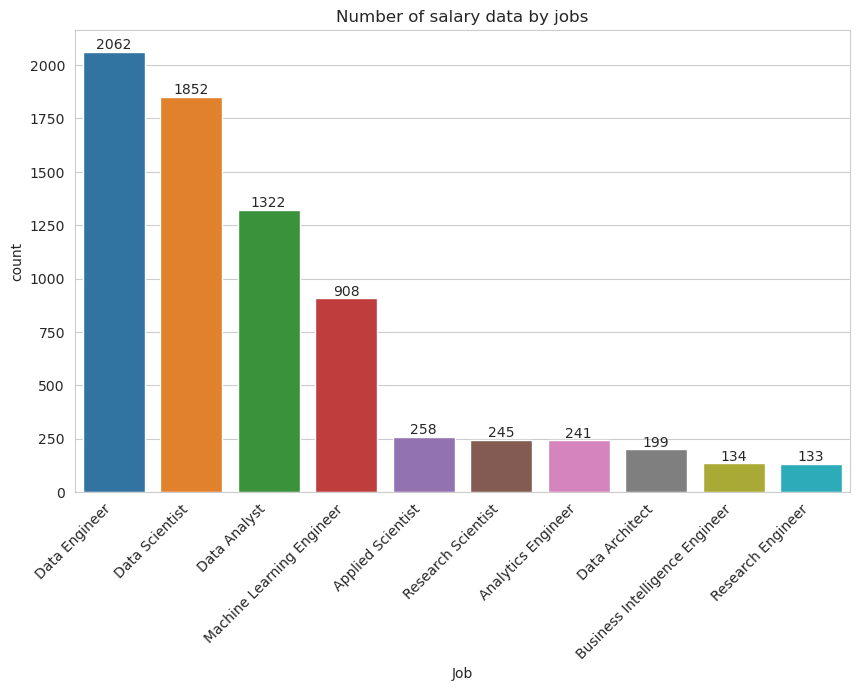

In [64]:
df_jobs = df['job_title'].value_counts().to_frame().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(df_jobs.head(10), x='job_title', y='count')
plt.title('Number of salary data by jobs')
plt.xlabel('Job')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Number of salary data by year

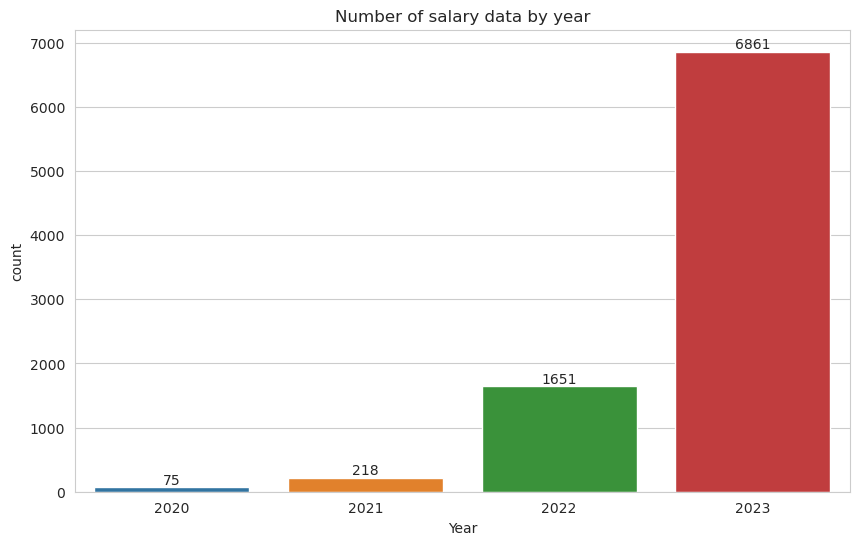

In [70]:
df_year = df['work_year'].value_counts().to_frame().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(df_year, x='work_year', y='count')
plt.title('Number of salary data by year')
plt.xlabel('Year')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Number of salary data by place of work and place of residence

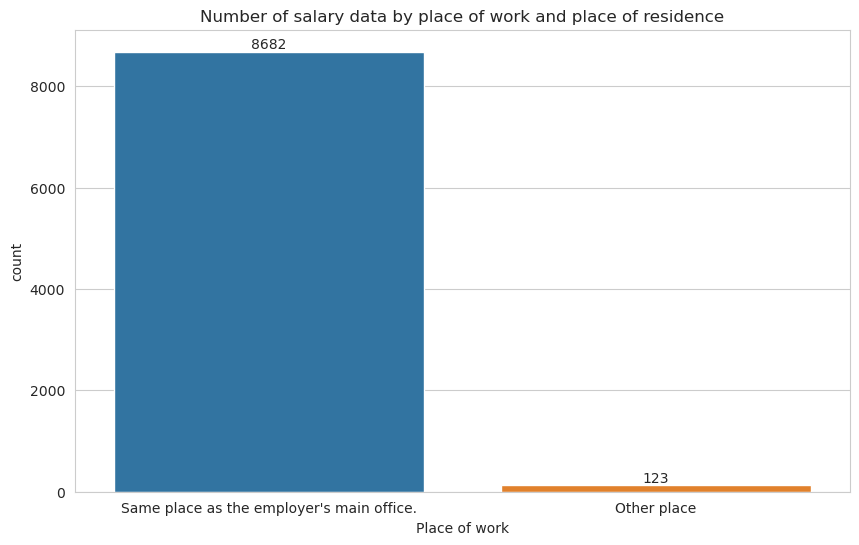

In [81]:
df_work_res = (df['employee_residence'] == df['company_location']).apply(lambda x: "Same place as the employer's main office." if x else "Other place").value_counts().to_frame().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(df_work_res, x='index', y='count')
plt.title('Number of salary data by place of work and place of residence')
plt.xlabel('Place of work')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## No remote word salary vs. Fully remote salary

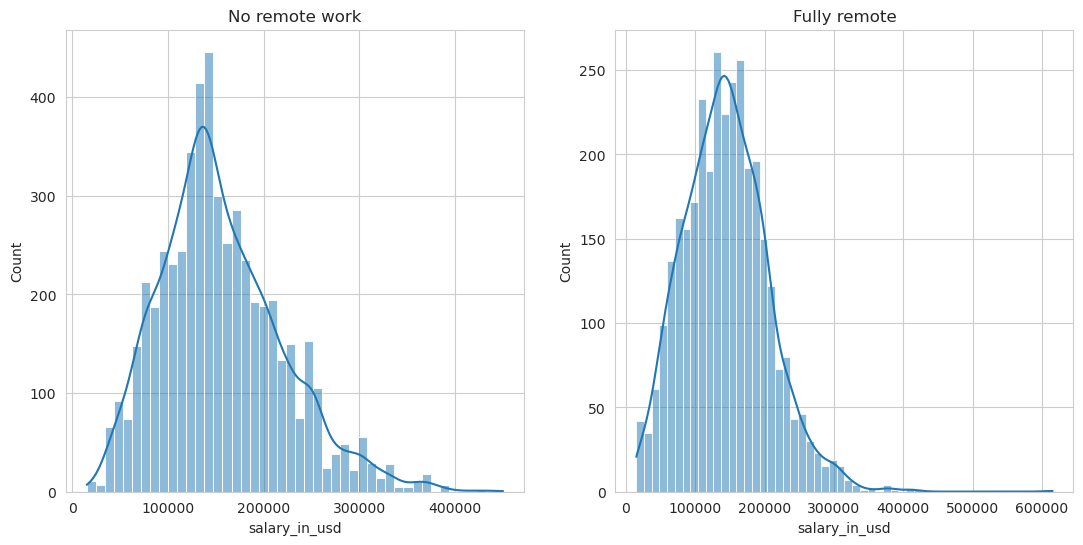

No remote work
Mean salary = 155592.48$

Fully remote
Mean salary = 144149.24$


In [113]:
df_remote_0 = df[df['remote_ratio'] == 0]
df_remote_100 = df[df['remote_ratio'] == 100]

fig, ax = plt.subplots(1, 2, figsize=(13, 6))
sns.histplot(data=df_remote_0['salary_in_usd'], ax=ax[0], kde=True)
ax[0].set_title('No remote work')

sns.histplot(data=df_remote_100['salary_in_usd'], ax=ax[1], kde=True)
ax[1].set_title('Fully remote')

plt.show()

print(f'No remote work\n'
      f'Mean salary = {df_remote_0["salary_in_usd"].mean():.2f}$\n\n'
      f'Fully remote\n'
      f'Mean salary = {df_remote_100["salary_in_usd"].mean():.2f}$')

As we can see, remote workers have lower salaries on average

## Salary by experience level

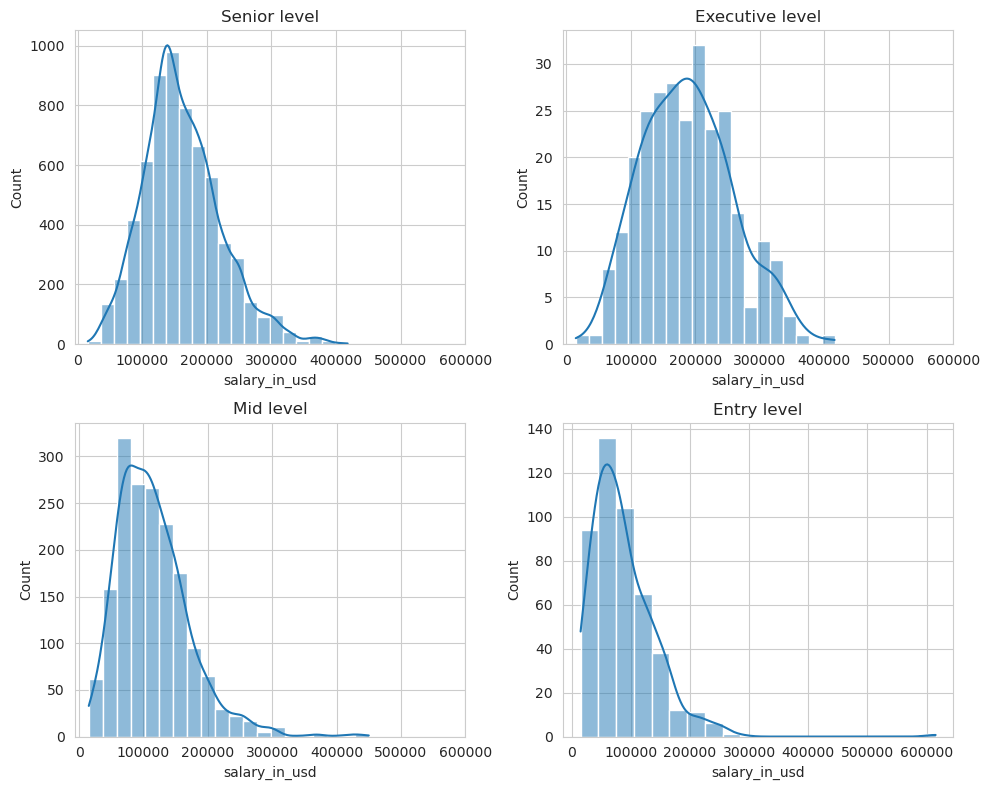

Senior level
Mean salary = 161889.01$

Executive level
Mean salary = 189052.62$

Mid level
Mean salary = 114681.02$

Entry level
Mean salary = 87676.76$


In [126]:
df_SE = df[df['experience_level'] == 'SE']
df_EX = df[df['experience_level'] == 'EX']
df_MI = df[df['experience_level'] == 'MI']
df_EN = df[df['experience_level'] == 'EN']
ticks = np.arange(0, df['salary_in_usd'].max()+1, 100000)


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(df_SE['salary_in_usd'], ax=axes[0, 0], kde=True, bins=20)
axes[0, 0].set_title('Senior level')
axes[0, 0].set_xticks(ticks)

sns.histplot(df_EX['salary_in_usd'], ax=axes[0, 1], kde=True, bins=20)
axes[0, 1].set_title('Executive level')
axes[0, 1].set_xticks(ticks)

sns.histplot(df_MI['salary_in_usd'], ax=axes[1, 0], kde=True, bins=20)
axes[1, 0].set_title('Mid level')
axes[1, 0].set_xticks(ticks)

sns.histplot(df_EN['salary_in_usd'], ax=axes[1, 1], kde=True, bins=20)
axes[1, 1].set_title('Entry level')
axes[1, 1].set_xticks(ticks)

plt.tight_layout()
plt.show()

print(f'Senior level\n'
      f'Mean salary = {df_SE["salary_in_usd"].mean():.2f}$\n\n'
      f'Executive level\n'
      f'Mean salary = {df_EX["salary_in_usd"].mean():.2f}$\n\n'
      f'Mid level\n'
      f'Mean salary = {df_MI["salary_in_usd"].mean():.2f}$\n\n'
      f'Entry level\n'
      f'Mean salary = {df_EN["salary_in_usd"].mean():.2f}$')

It is worth keeping in mind that for Entry level and for Executive level we have little data compared to other levels, so the average salary shows the approximate difference.

## Salary by job

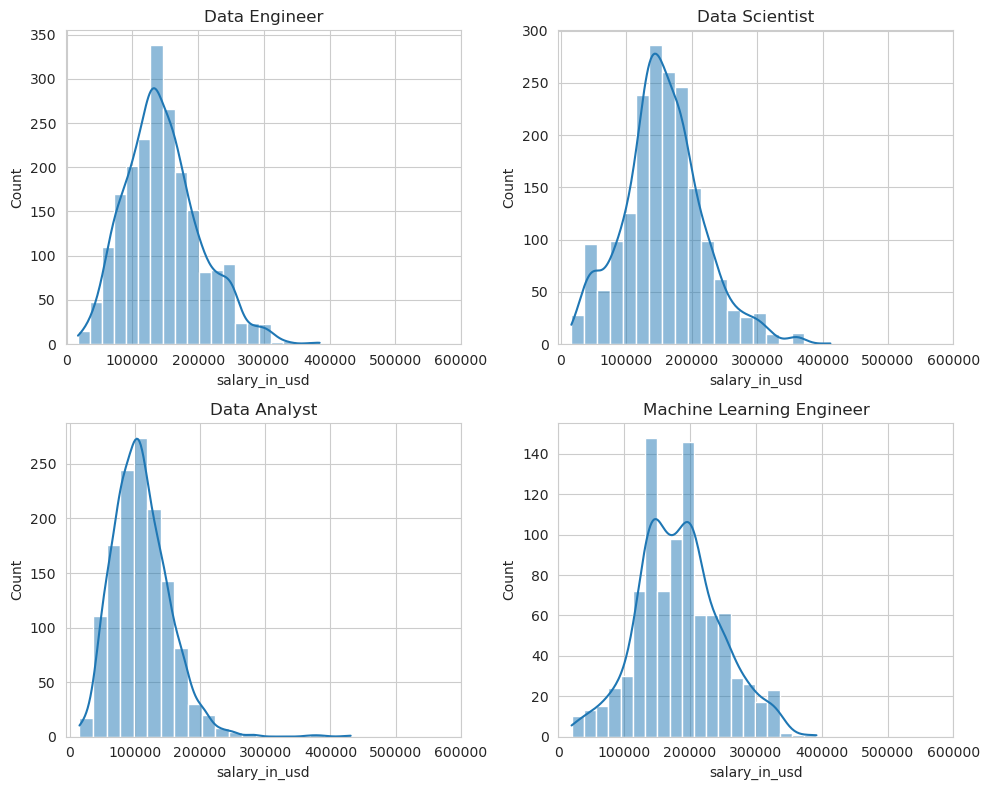

Data Engineer
Mean salary = 146596.06$

Data Scientist
Mean salary = 156074.36$

Data Analyst
Mean salary = 109693.81$

Machine Learning Engineer
Mean salary = 183569.94$


In [136]:
df_DE = df[df['job_title'] == 'Data Engineer']
df_DS = df[df['job_title'] == 'Data Scientist']
df_DA = df[df['job_title'] == 'Data Analyst']
df_ML = df[df['job_title'] == 'Machine Learning Engineer']
ticks = np.arange(0, df['salary_in_usd'].max()+1, 100000)


fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(df_DE['salary_in_usd'], ax=axes[0, 0], kde=True, bins=20)
axes[0, 0].set_title('Data Engineer')
axes[0, 0].set_xticks(ticks)

sns.histplot(df_DS['salary_in_usd'], ax=axes[0, 1], kde=True, bins=20)
axes[0, 1].set_title('Data Scientist')
axes[0, 1].set_xticks(ticks)

sns.histplot(df_DA['salary_in_usd'], ax=axes[1, 0], kde=True, bins=20)
axes[1, 0].set_title('Data Analyst')
axes[1, 0].set_xticks(ticks)

sns.histplot(df_ML['salary_in_usd'], ax=axes[1, 1], kde=True, bins=20)
axes[1, 1].set_title('Machine Learning Engineer')
axes[1, 1].set_xticks(ticks)

plt.tight_layout()
plt.show()

print(f'Data Engineer\n'
      f'Mean salary = {df_DE["salary_in_usd"].mean():.2f}$\n\n'
      f'Data Scientist\n'
      f'Mean salary = {df_DS["salary_in_usd"].mean():.2f}$\n\n'
      f'Data Analyst\n'
      f'Mean salary = {df_DA["salary_in_usd"].mean():.2f}$\n\n'
      f'Machine Learning Engineer\n'
      f'Mean salary = {df_ML["salary_in_usd"].mean():.2f}$')

## Salary by company size

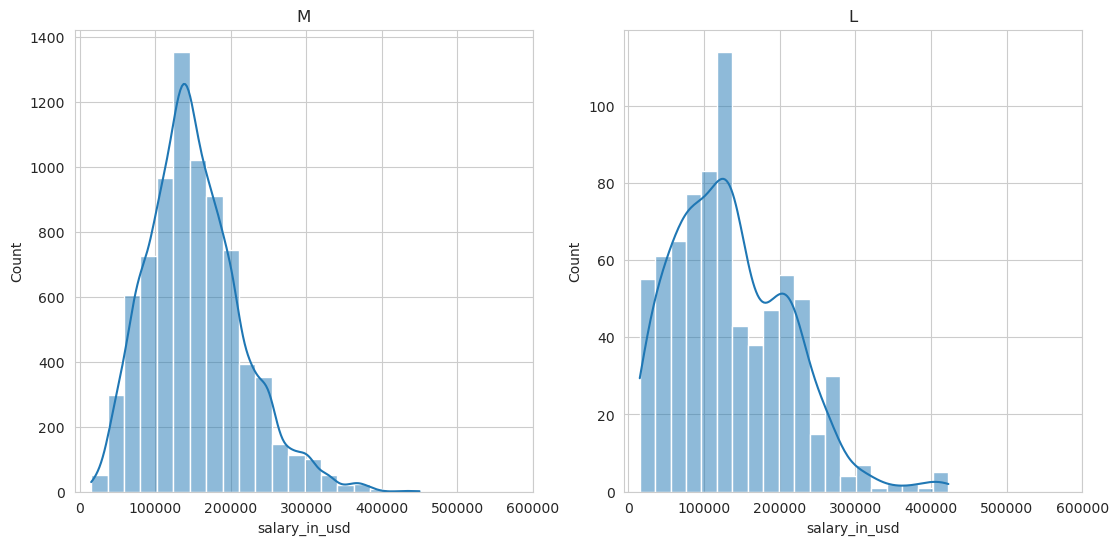

M
Mean salary = 152115.65$
Data size = 7881

L
Mean salary = 134942.57$
Data size = 756


In [143]:
df_size_M = df[df['company_size'] == 'M']
df_size_L = df[df['company_size'] == 'L']

fig, ax = plt.subplots(1, 2, figsize=(13, 6))
sns.histplot(data=df_size_M['salary_in_usd'], ax=ax[0], kde=True, bins=20)
ax[0].set_title('M')
ax[0].set_xticks(ticks)

sns.histplot(data=df_size_L['salary_in_usd'], ax=ax[1], kde=True, bins=20)
ax[1].set_title('L')
ax[1].set_xticks(ticks)

plt.show()

print(f'M\n'
      f'Mean salary = {df_size_M["salary_in_usd"].mean():.2f}$\n'
      f'Data size = {df_size_M.shape[0]}\n\n'
      f'L\n'
      f'Mean salary = {df_size_L["salary_in_usd"].mean():.2f}$\n'
      f'Data size = {df_size_L.shape[0]}')

As we see in medium-sized companies the average salary is higher than in large companies. It should be taken into account that the sample sizes are very different. I have made this comparison just to show one more factor influencing the wages of employees.

# Conclusion

This project analyzed a set of salary data. The findings are based on data visualization and statistical calculations. Some key findings include:


* Distribution of salaries: Salaries have a normal distribution, but there are a few upward outliers.
* Experience Level: The most salary data is for Senior-level employees and the least for Executive-level employees.
* Employment Type: The majority of salary data is for Full-time employees, while there is much less data for other types of employment.
* Salaries by country: Most data is concentrated in the US, making it difficult to compare salaries between different countries due to the limited amount of data.
* Remote Work: Salaries for employees who work remotely are, on average, lower than those who do not work remotely.
* Salaries by experience level and position: Average salaries vary by experience level and position. However, for some levels and positions, there is too little data to draw accurate conclusions.
* Salaries by company size: Average salaries in medium-sized companies were higher than in large companies, but it is worth bearing in mind that sample sizes vary.